### Оценка эффективности моделей бинарной классификации.

#### Цель работы

Научиться оценивать эффективность моделей классификации.

#### Содержание работы

1. Загрузите данные о вероятности развития сердечного приступа. 
Описание датасета смотрите здесь: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.
2. Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.
3. Постройте следующие модели классификации:
    1. случайное предсказание (подбрасывание кубика)
    2. логистическая регрессия (LogisticRegression);
    3. метод опорных векторов с линейным ядром (SVC(kernel='linear'));
    4. метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
    5. метод k ближайших соседей (KNeighborsClassifier с двумя классами).
4. На основе метрики  accuracy  сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.
5. Сделайте вывод о применимости каждой модели на основе метрики  F1-score (чем выше её значение, тем модель эффективнее).
6. На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.
7. Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.


#### Методические указания

Загрузим данные в датафрейм `data`.
Целевым значением будет значение `"output"` - случится приступ или нет. Вынесем этот столбец в отдельную переменную `y`, а в переменную `x` запишем все столбцы из `data`, кроме столбца `target`:

```py
target = "output"
y = data[target]
x = data.drop(target, axis=1)
```

Импортируем нужные библиотеки для вычисления метрик:
```py
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score

```
Вычислим метрику accuracy на тренировочном датасете:
```py
y_pred_train = model.predict(x_train)
accuracy_score(y_train, y_pred_train)
```

Вычислим метрику accuracy на тестовом датасете:
```py
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)
```

Вычислим метрику F1-score:
```py
f1 = f1_score(y_valid, y_pred)
```

Алгоритм логистической регрессии позволяет получить не только предсказанную метку класса, но и вероятность принадлежности этому классу. Эти вероятности можно получить с помощью метода .predict_proba:

```py
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba((x_test)
```

Рассчитываем значения, необходимые для построения ROC-кривой (receiver operating characteristics curve):

```py
probs = y_pred_proba[:, 1]
fpr, tpr, treshold = roc_curve(y_test, probs)
```

Построить график ROC-кривой можно следующим образом:

```py
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
```
Вычислим значение площади под кривой (AUC-area under curve). Чем лучше классификатор разделяет два класса, тем больше эта площадь и ближе к 1:

```py
roc_auc = auc(fpr, tpr)
```

#### Задания для самостоятельного выполнения

1. Изобразите precision-recall кривую.
2. Оцените эффективность моделей при помощи показателя average precision.
3. Постройте другую классификационную модель и сравните ее с описанными по следующим метрикам: accuracy, precision, recall, ROC-AUC, F1. Сделайте вывод о том, какая модель наиболее удачная для данной задачи.

#### Контрольные вопросы

1. Что обозначают элементы confusion matrix?
2. По какой формуле рассчитывается метрика accuracy? Что она показывает?
3. Почему метрика accuracy непригодна при дисбалансе классов?
4. По какой формуле рассчитывается метрика precision? Что она показывает?
5. По какой формуле рассчитывается метрика recall? Что она показывает?
6. Какая метрика объединяет в себе precision и recall? По какой формуле она рассчитывается?
7. Какой показатель часто используется для сравнительного анализа нескольких моделей классификации?
8. Зависимость каких величин (при изменении порога) показывает ROC-кривая?

#### Содержание работы



In [1]:
import pandas as pd

1. Загрузите данные о вероятности развития сердечного приступа. 
Описание датасета смотрите здесь: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.


In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
target = heart.output
heart.drop(columns = ['output'], inplace = True)

2. Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.


In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(heart, target, test_size=0.2, shuffle=True)
print("X_train shape:",x_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (242, 13)
y_train shape:(242,)


3. Постройте следующие модели классификации:
    1. случайное предсказание (подбрасывание кубика)
    2. логистическая регрессия (LogisticRegression);
    3. метод опорных векторов с линейным ядром (SVC(kernel='linear'));
    4. метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
    5. метод k ближайших соседей (KNeighborsClassifier с двумя классами).


In [5]:
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLPClassifier',
        'LinearDiscriminantAnalysis'
    ]
)

In [55]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall),
        index=['accuracy', 'precision', 'recall']
    )

In [56]:
def model_and_metrics(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    returned = get_metrics(y_test, y_pred)
    return returned

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores.iloc[0] = model_and_metrics(model)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn import svm

model = svm.SVC(kernel='linear')
scores.iloc[1] = model_and_metrics(model)

In [59]:
from sklearn import svm

model = svm.SVC(kernel='rbf')
scores.iloc[2] = model_and_metrics(model)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
scores.iloc[3] = model_and_metrics(model)

In [61]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
scores.iloc[4] = model_and_metrics(model)

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
scores.iloc[5] = model_and_metrics(model)

In [63]:
scores

,accuracy,precision,recall
LogisticRegression,0.786885,0.789474,0.857143
SVC linear,0.770492,0.769231,0.857143
SVC gauss,0.655738,0.652174,0.857143
KNeighborsClassifier,0.557377,0.6,0.685714
MLPClassifier,0.754098,0.708333,0.971429
LinearDiscriminantAnalysis,0.770492,0.756098,0.885714


4. На основе метрики  accuracy  сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.


In [127]:
scores_accuracy = pd.DataFrame(
    columns=['accuracy'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLPClassifier',
        'LinearDiscriminantAnalysis'
    ]
)

In [128]:
from sklearn import metrics

# y_train, y_pred != shape
def get_metrics(y_train, y_pred):
    accuracy = metrics.accuracy_score(y_train, y_pred)
    return pd.Series(
        (accuracy),
        index=['accuracy']
    )

In [129]:
def model_and_metrics(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)  
    returned = get_metrics(y_train, y_pred)
    return returned

In [130]:
estimators = [LogisticRegression(), 
              svm.SVC(kernel='linear'), 
              svm.SVC(kernel='rbf'), 
              KNeighborsClassifier(), 
              MLPClassifier(),
              LinearDiscriminantAnalysis()]

index = 0
for model in estimators:
    scores_accuracy.iloc[index] = model_and_metrics(model)
    index += 1

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(242,) (242,)
(242,) (242,)
(242,) (242,)
(242,) (242,)
(242,) (242,)
(242,) (242,)


In [131]:
scores_accuracy # на обучающей

,accuracy
LogisticRegression,0.871901
SVC linear,0.863636
SVC gauss,0.673554
KNeighborsClassifier,0.743802
MLPClassifier,0.822314
LinearDiscriminantAnalysis,0.859504


In [132]:
scores

,accuracy,precision,recall
LogisticRegression,0.786885,0.789474,0.857143
SVC linear,0.770492,0.769231,0.857143
SVC gauss,0.655738,0.652174,0.857143
KNeighborsClassifier,0.557377,0.6,0.685714
MLPClassifier,0.754098,0.708333,0.971429
LinearDiscriminantAnalysis,0.770492,0.756098,0.885714


Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

5. Сделайте вывод о применимости каждой модели на основе метрики  F1-score (чем выше её значение, тем модель эффективнее).


In [70]:
scores_f1_score = pd.DataFrame(
    columns=['f1_score'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLPClassifier',
        'LinearDiscriminantAnalysis'
    ]
)

In [71]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (f1_score),
        index=['f1_score']
    )

In [72]:
estimators = [LogisticRegression(), 
              svm.SVC(kernel='linear'), 
              svm.SVC(kernel='rbf'), 
              KNeighborsClassifier(), 
              MLPClassifier(),
              LinearDiscriminantAnalysis()]

index = 0
for model in estimators:
    scores_f1_score.iloc[index] = model_and_metrics(model)
    index += 1

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
scores_f1_score

,f1_score
LogisticRegression,0.821918
SVC linear,0.810811
SVC gauss,0.740741
KNeighborsClassifier,0.64
MLPClassifier,0.746269
LinearDiscriminantAnalysis,0.815789


6. На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.


In [103]:
# https://habr.com/ru/company/netologyru/blog/582756/
# https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/

In [95]:
from yellowbrick.classifier import ROCAUC

def ROC_AUC(model):
    visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

    visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(x_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure

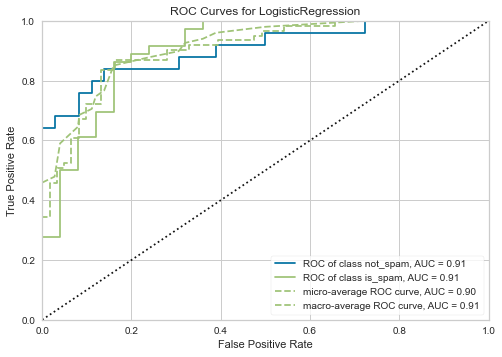

In [96]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
ROC_AUC(model)

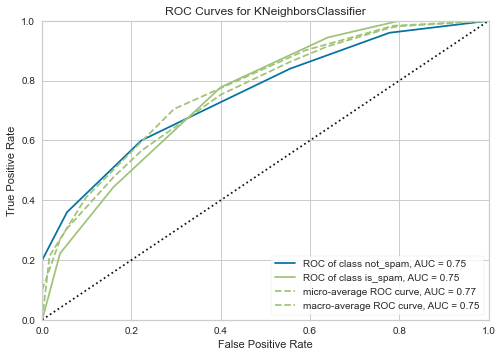

In [99]:
model = KNeighborsClassifier()
ROC_AUC(model)

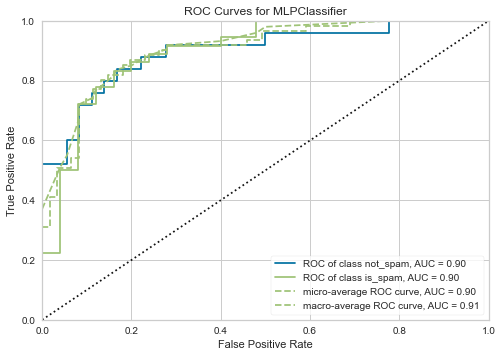

In [100]:
model = MLPClassifier()
ROC_AUC(model)

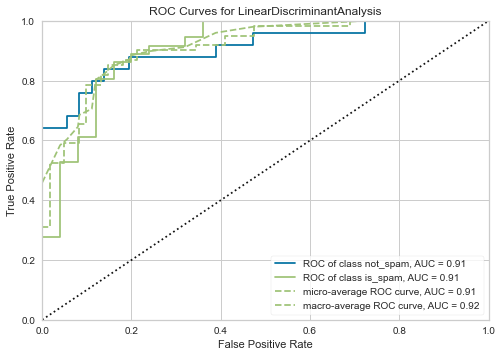

In [101]:
model = LinearDiscriminantAnalysis()
ROC_AUC(model)

7. Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.


Грубо говоря, ROC кривая показывает процентное соотношение пар объектов, которая модель верно классифицировала. AOC - это площадь под графиком, в числовом формате говорящая о качестве

ROC классификация того что надо и отбрасывание объектов, не входящих в класс


#### Задания для самостоятельного выполнения



1. Изобразите precision-recall кривую.


precision - точность TP/TP+FP = доля верно классифицированных объектов \
recall - полнота TP/TP+FN = доля верно классифицированных объектов из всех

In [117]:
# https://habr.com/ru/post/661119/

In [105]:
import matplotlib.pyplot as plt

from yellowbrick.classifier import PrecisionRecallCurve

def precision_recall(model):
    # Create the visualizer, fit, score, and show it
    viz = PrecisionRecallCurve(model)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

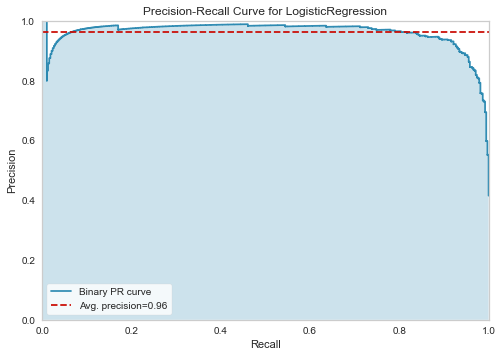

In [106]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
precision_recall(model)

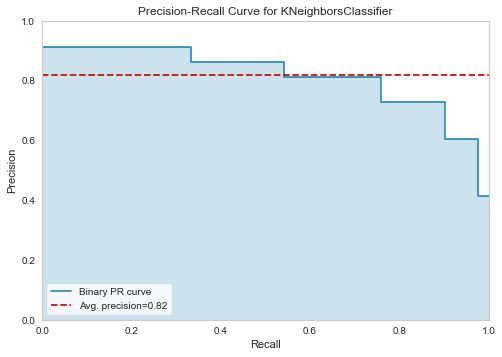

In [107]:
model = KNeighborsClassifier()
precision_recall(model)

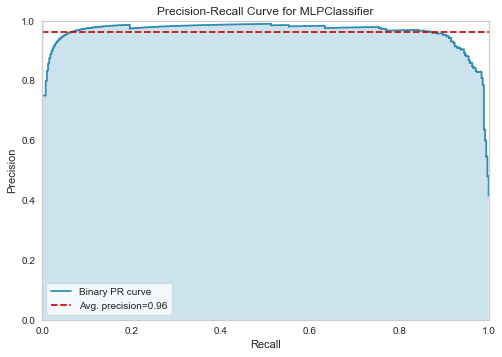

In [108]:
model = MLPClassifier()
precision_recall(model)

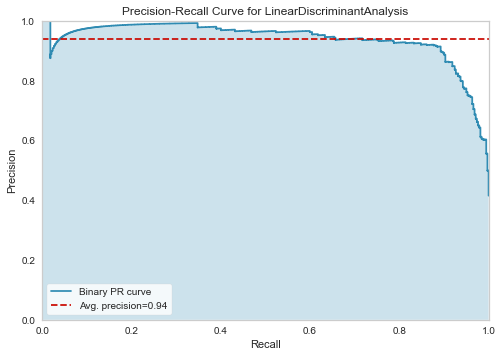

In [109]:
model = LinearDiscriminantAnalysis()
precision_recall(model)

2. Оцените эффективность моделей при помощи показателя average precision.


3. Постройте другую классификационную модель и сравните ее с описанными по следующим метрикам: accuracy, precision, recall, ROC-AUC, F1. Сделайте вывод о том, какая модель наиболее удачная для данной задачи.